# <center>RunKeeper analysis</center>
<img src="./runner_in_blue.jpg" />

## Obtain and review raw data

**Importing required libraries**

In [ ]:
# yahan humne saari librar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

**loading dataset**

In [2]:
dataset = pd.read_csv('cardioActivities.csv',parse_dates=True,index_col='Date')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

**We see that there are total 508 observations and 13 columns**

In [4]:
dataset.head()

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


## Data Preprocessing

**There are a few columns which we don't require for analysis like activity Id,Route Name ( becuase there's a sinlge route ), Friend's Tagged, Notes and GPX File so we need to remove these columns**

In [5]:
cols = ['Activity Id','Route Name',"Friend's Tagged",'Notes','GPX File']

In [6]:
# dropping the unnecessary columns
dataset.drop(columns=cols, axis=1, inplace=True)

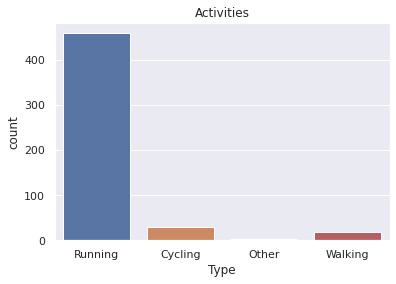

In [7]:
plt.title('Activities')
sns.countplot(x=dataset.Type)
plt.show()

**It seems that most of the runners have chosen Running activity to burn their calories**

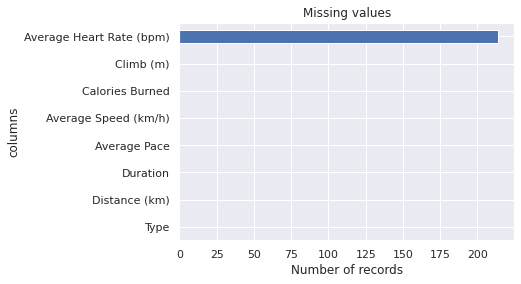

In [8]:
# counting missing values
plt.title('Missing values')
dataset.isnull().sum().plot.barh()
plt.xlabel('Number of records')
plt.ylabel('columns')
plt.show()

**Average Heat Rate column has the great number of missing values**

## Dealing with Missing values

**before filling the missing values let's first check if we have the outliers, accordingly we will fill the missing values**

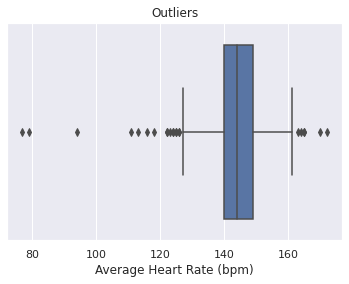

In [9]:
# boxplot to see outliers
plt.title('Outliers')
sns.boxplot(x=dataset['Average Heart Rate (bpm)'])
plt.show()

In [10]:
# As we know that mean() is sensitive to outliers that's why we will fill the missing values with median
dataset['Average Heart Rate (bpm)'].fillna(dataset['Average Heart Rate (bpm)'].median(), inplace=True)

## Plotting running data

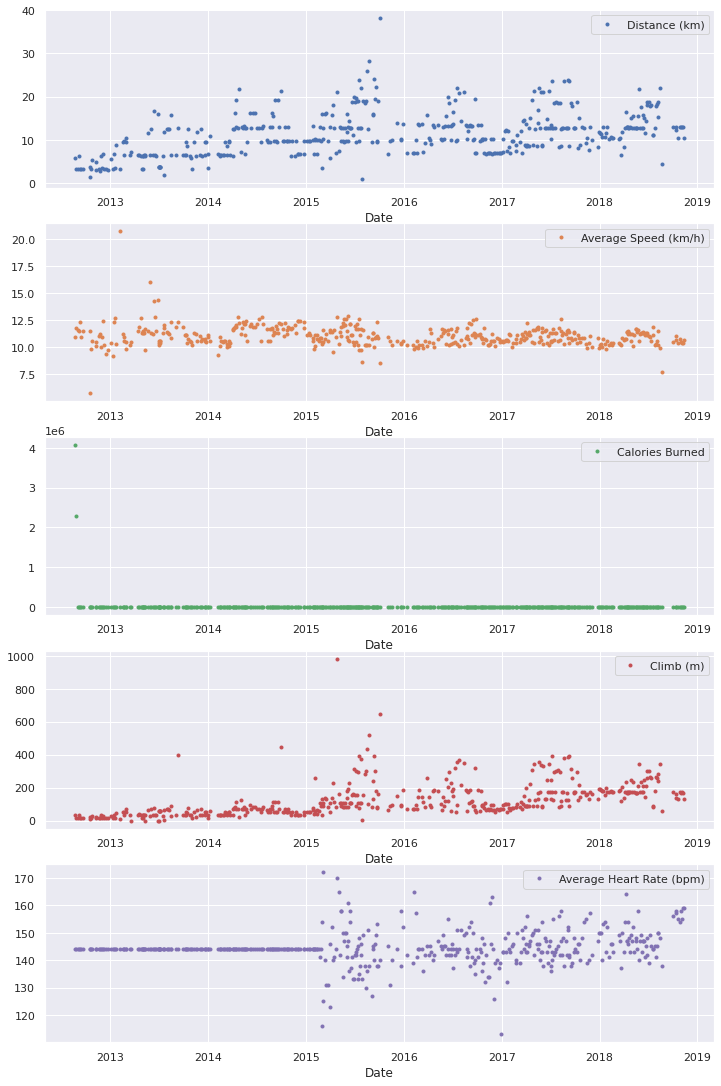

In [11]:
dataset[dataset['Type']=='Running'].plot(subplots=True,
               sharex=False,
               figsize=(12,19),
               linestyle='none',
               marker='o',
               markersize=3,
              )
plt.show()

## Running statistics

In [12]:
display(dataset[dataset['Type']=='Running'].resample('A').mean())

,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
Date,,,,,
2012-12-31,3.820476,10.671905,303169.761905,20.666667,144.000000
2013-12-31,7.549242,11.399545,528.030303,45.166667,144.000000
2014-12-31,10.953043,11.519130,775.333333,65.275362,144.000000
2015-12-31,13.602805,10.998902,932.906138,160.170732,143.353659
2016-12-31,11.411667,10.837778,796.152777,133.194444,143.388889
2017-12-31,12.935176,10.959059,914.164706,169.376471,145.247059
2018-12-31,13.339063,10.777969,952.359375,191.218750,148.125000



* What is your average distance?
* How fast do you run?
* Do you measure your heart rate?

**Average distance**

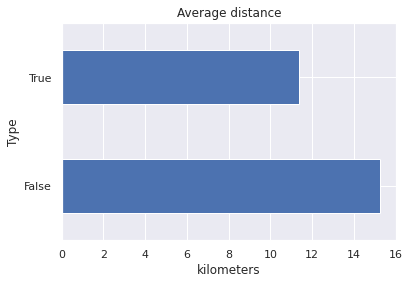

In [13]:
plt.title('Average distance')
plt.xlabel('kilometers')
dataset.groupby(dataset['Type']=='Running')['Distance (km)'].mean().plot.barh()
plt.show()

**Average Speed**

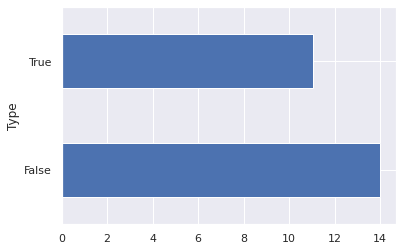

In [14]:
dataset.groupby(dataset['Type']=='Running')['Average Speed (km/h)'].mean().plot.barh()
plt.show()

**Heart Rate**

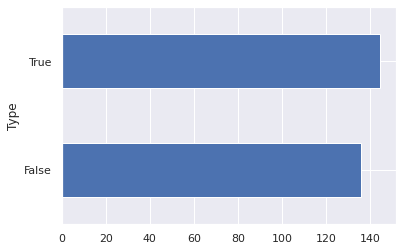

In [15]:
dataset.groupby(dataset['Type']=='Running')['Average Heart Rate (bpm)'].mean().plot.barh()
plt.show()

**weekly statistics average**

In [16]:
display(dataset[dataset['Type']=='Running'].resample('W').mean().mean())

Distance (km)                  11.077066
Average Speed (km/h)           11.041053
Calories Burned             12601.263963
Climb (m)                     118.470260
Average Heart Rate (bpm)      144.503717
dtype: float64

## Visualization with averages

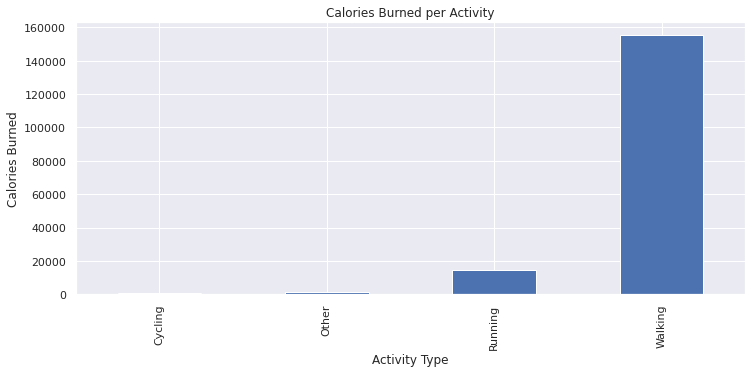

In [17]:
plt.figure(figsize=(12,5))
plt.title('Calories Burned per Activity')
ax=dataset.groupby(['Type'])['Calories Burned'].mean().plot(kind='bar')
plt.xlabel('Activity Type')
plt.ylabel('Calories Burned')
plt.show()

In [18]:
# creating running activity dataset
running = dataset[dataset['Type']=='Running']

In [19]:
# running distance average
dist_avrg=running['Distance (km)'].mean()
# running heart rate average
heart_avrg=running['Average Heart Rate (bpm)'].mean()

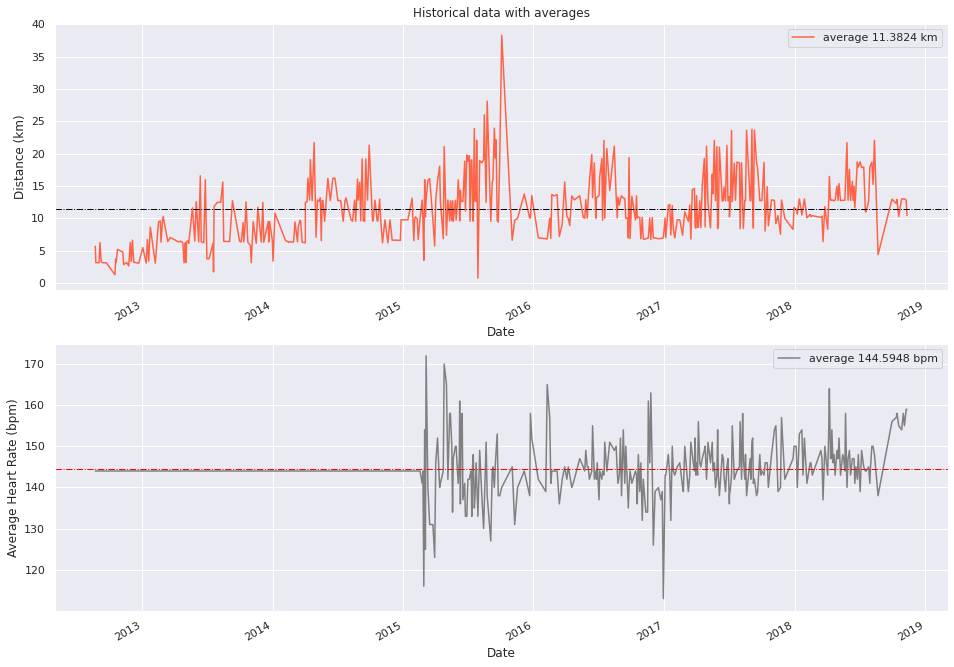

In [20]:
# creating subplots
fig, (ax1,ax2) = plt.subplots(2,figsize=(16,12))

# plotting running distance
running['Distance (km)'].plot(ax=ax1, label= f'average {dist_avrg:.4f} km', color='tomato')
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(running['Distance (km)'].mean(), color='black', linewidth=1, linestyle='-.')
ax1.legend()

# plotting heart rate
running['Average Heart Rate (bpm)'].plot(ax=ax2, label= f'average {heart_avrg:.4f} bpm', color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(running['Average Heart Rate (bpm)'].mean(), color='red', linewidth=1, linestyle='-.')
ax2.legend()

plt.show()

## Did I reach my goals

In [21]:
goal=dataset.groupby(dataset['Type']=='Running')['Distance (km)'].resample('A').sum()

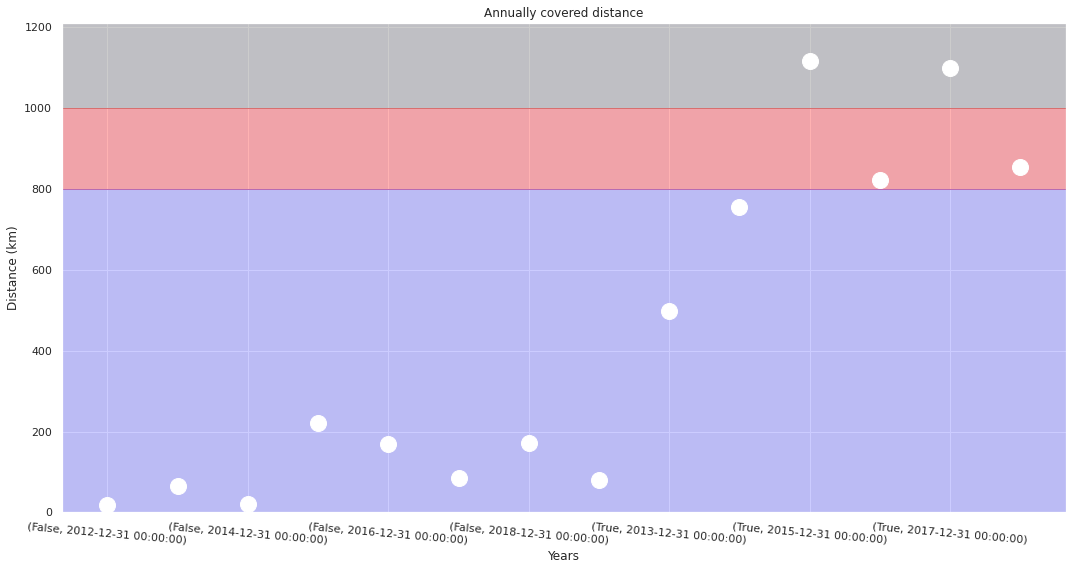

In [22]:
plt.figure(figsize=(18,9))
ax=goal.plot(marker='o', markersize=16, linewidth=0, color='white')
ax.set(ylim=[0, 1210],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annually covered distance')
plt.xticks(rotation=-5)
ax.axhspan(1000, 1210, color='gray', alpha=0.4)
ax.axhspan(800, 1000, color='red', alpha=0.3)
ax.axhspan(0, 800, color='blue', alpha=0.2)

plt.show()

## Am I progressing

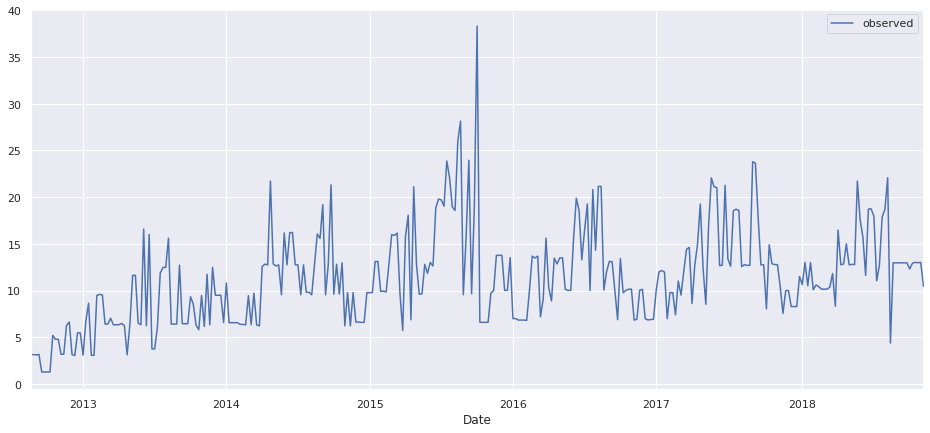

In [23]:
fig, ax = plt.subplots(figsize=(16,7))
ax=running['Distance (km)'].resample('W').bfill().plot(label='observed')
plt.legend()
plt.show()

## Training Intensity

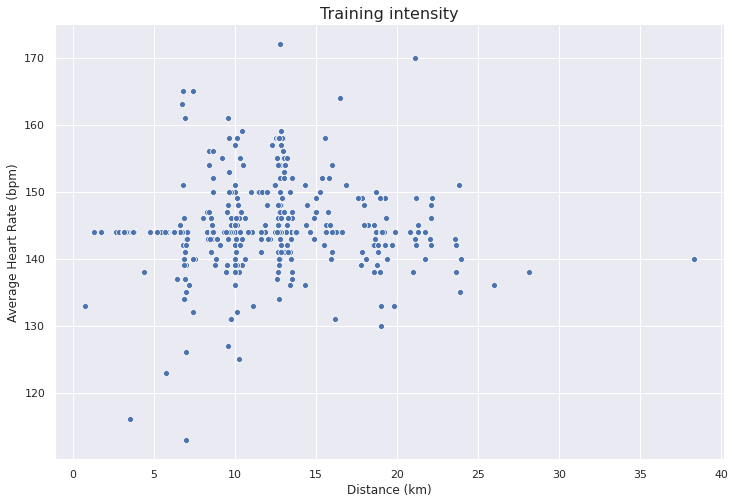

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=running['Distance (km)'], y=running['Average Heart Rate (bpm)'])
plt.title('Training intensity', size=16)
plt.show()

## Detailed summary report

In [25]:
summary = dataset.groupby('Type')['Distance (km)', 'Climb (m)', 'Average Speed (km/h)'].describe()
summary.stack()

<ipython-input-25-402c04b4f31e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary = dataset.groupby('Type')['Distance (km)', 'Climb (m)', 'Average Speed (km/h)'].describe()


Distance (km)   Climb (m)  Average Speed (km/h)
Type                                                          
Cycling count      29.000000   29.000000             29.000000
        mean       23.468276  240.551724             19.125172
        std         9.451040  128.960289              3.257100
        min        11.410000   58.000000             11.380000
        25%        15.530000  139.000000             16.980000
        50%        20.300000  199.000000             19.500000
        75%        29.400000  318.000000             21.490000
        max        49.180000  553.000000             24.330000
Other   count       2.000000    2.000000              2.000000
        mean       17.225000  210.500000             16.100000
        std         0.601041   12.020815              1.598061
        min        16.800000  202.000000             14.970000
        25%        17.012500  206.250000             15.535000
        50%        17.225000  210.500000             16.100000
        75%        17.437500  214.750000             16.665000
        max        17.650000  219.000000             17.230000
Running count     459.000000  459.000000            459.000000
        mean       11.382353  124.788671             11.056296
        std         4.937853  103.382177              0.953273
        min         0.760000    0.000000              5.770000
        25%         7.415000   54.000000             10.495000
        50%        10.810000   91.000000             10.980000
        75%        13.190000  171.000000             11.520000
        max        38.320000  982.000000             20.720000
Walking count      18.000000   18.000000             18.000000
        mean        1.858333   19.388889              5.549444
        std         0.880055   27.110100              1.459309
        min         1.220000    5.000000              1.040000
        25%         1.385000    7.000000              5.555000
        50%         1.485000   10.000000              5.970000
        75%         1.787500   15.500000              6.512500
        max         4.290000  112.000000              6.910000